In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/ETH-USD.csv')

In [21]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.30095687],
       [0.31147116],
       [0.33619119]])

In [23]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05839797, 0.06268138, 0.06892405,
       0.08261865, 0.08079221, 0.0818612 , 0.08377014, 0.08219371,
       0.07259534, 0.07673914, 0.08084805, 0.08019425, 0.08070273,
       0.08162304, 0.08015872, 0.0728206 , 0.07405162, 0.07862523,
       0.08232062, 0.07559844, 0.09112687, 0.11995542, 0.1308138 ,
       0.12934354, 0.12693903, 0.12942667, 0.13445355, 0.15024744,
       0.15705359, 0.1554171 , 0.15583526, 0.12491102, 0.13432919,
       0.12899074, 0.14415345, 0.14584601, 0.1435206 , 0.13805948,
       0.14156408, 0.13387866, 0.14222845, 0.14559324, 0.16924134,
       0.18579795, 0.18964797, 0.19320101, 0.20249926, 0.22608115])]
[0.22509971577339596]

[array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=30)

Epoch 1/100
56/56 [==============================] - 10s 108ms/step - loss: 0.0050
Epoch 2/100
56/56 [==============================] - 7s 132ms/step - loss: 0.0012
Epoch 3/100
56/56 [==============================] - 6s 107ms/step - loss: 9.8939e-04
Epoch 4/100
56/56 [==============================] - 7s 130ms/step - loss: 9.5651e-04
Epoch 5/100
56/56 [==============================] - 6s 116ms/step - loss: 7.7749e-04
Epoch 6/100
56/56 [==============================] - 7s 122ms/step - loss: 7.7928e-04
Epoch 7/100
56/56 [==============================] - 7s 121ms/step - loss: 7.1187e-04
Epoch 8/100
56/56 [==============================] - 7s 119ms/step - loss: 6.3320e-04
Epoch 9/100
56/56 [==============================] - 7s 128ms/step - loss: 5.7537e-04
Epoch 10/100
56/56 [==============================] - 6s 109ms/step - loss: 5.5191e-04
Epoch 11/100
56/56 [==============================] - 7s 134ms/step - loss: 5.1548e-04
Epoch 12/100
56/56 [==============================] - 6s 10

In [25]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 2s 79ms/step


In [26]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

52.90884611479364

In [28]:
valid

,Close,Predictions
1829,1255.268311,1323.496582
1830,1221.819214,1302.274048
1831,1241.604248,1270.309448
1832,1251.736206,1279.938110
1833,1215.602539,1291.526978
...,...,...
1920,1539.926758,1563.555664
1921,1515.033691,1577.696045
1922,1507.165894,1561.270996
1923,1556.875122,1551.620728


<ipython-input-27-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


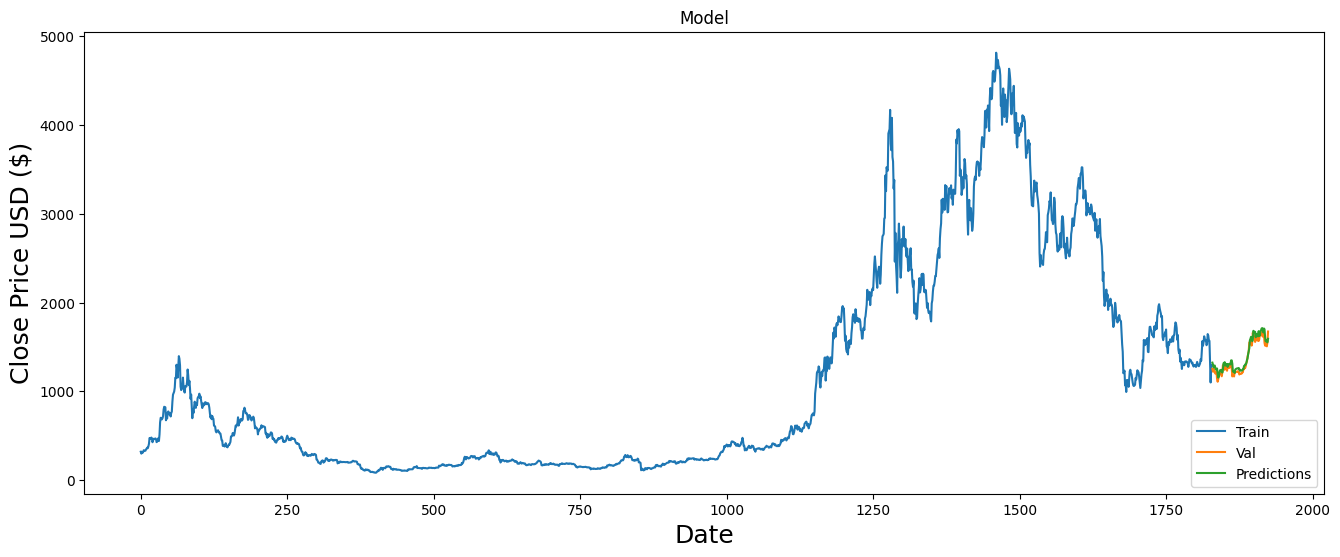

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()